In [5]:
%matplotlib inline                         

import numpy as np

import matplotlib.pyplot as plt 
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D2V"
R = [5,10,20]
model = "Full"         # Full - fully kinetic PIC; Hybrid - Hybrid PIC
step = 49100*8         #[49100*2,49100*4,49100*8]
species = "e"          # Usually only the electron temperature in fully kinetic PIC simulations is outputed
components = ["x","y"]
for i in range(len(R)):
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R[i])
    dat_files = ["{dat_dir}/temperature_{spec}_{component}_step{step}.dat".format( \
    dat_dir=dat_dir, spec=species, component=component, step=step) for component in components]
    print("Loading data from {} ...".format(dat_files))   # Input velocity data 
    locals()['t_{}'.format(R[i])] = [np.genfromtxt(dat_file) for dat_file in dat_files] # 循环计数命名

    # Input num_den data
    dat_dir = "../../Data/{model}/{dimension}/R{R:g}".format(model=model, dimension=dimension, R=R[i])
    dat_file = "{}/number_density_{}_step{s:g}.dat".format(dat_dir, species, s=step)  
    print("Loading data from [{}] ...".format(dat_file))
    locals()['ne_{}'.format(R[i])] = np.genfromtxt(dat_file)
print("Loading data completed!")


Loading data from ['../../Data/Full/2D2V/R5/temperature_e_x_step392800.dat', '../../Data/Full/2D2V/R5/temperature_e_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D2V/R5/number_density_e_step392800.dat] ...
Loading data from ['../../Data/Full/2D2V/R10/temperature_e_x_step392800.dat', '../../Data/Full/2D2V/R10/temperature_e_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D2V/R10/number_density_e_step392800.dat] ...
Loading data from ['../../Data/Full/2D2V/R20/temperature_e_x_step392800.dat', '../../Data/Full/2D2V/R20/temperature_e_y_step392800.dat'] ...
Loading data from [../../Data/Full/2D2V/R20/number_density_e_step392800.dat] ...
Loading data completed!


In [9]:
ny, nx = t_10[0].shape
dx = 1; nx_show = [0, 720+1]
dy = 1; ny_show = [0, 240+1]
x = dx*np.arange(nx)
y = dy*np.arange(ny)
X, Y = np.meshgrid(x,y)

In [10]:
n_screenout = 1e-3  # n = 0 if < n_screenout   # 清除field中 ne<1e-3 流场的温度
for t in t_5:
    t[ne_5 < n_screenout] = 0
for t in t_10:
    t[ne_10 < n_screenout] = 0
for t in t_20:
    t[ne_20 < n_screenout] = 0

In [38]:
fontsize_label=18.2
fontsize_tick=16

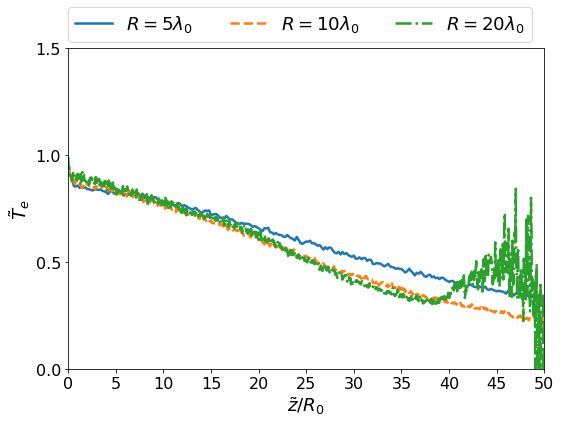

In [42]:
fig, ax = plt.subplots(figsize=(8, 6))

xnd=[x/5, x/10, x/20]
xend = 50
iy = 0

#ax.plot(xnd[0], t_5[0][iy,:], "-",  label="${R}=5{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[0], t_5[1][iy,:], "-",  label="${R}=5{\lambda}_0$",linewidth=2.5)
#ax.plot(xnd[1], t_10[0][iy,:], "--", label="${R}=10{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[1], t_10[1][iy,:], "--", label="${R}=10{\lambda}_0$",linewidth=2.5)
#ax.plot(xnd[2], t_20[0][iy,:], "-.", label="${R}=20{\lambda}_0$",linewidth=2.5)
ax.plot(xnd[2], t_20[1][iy,:], "-.", label="${R}=20{\lambda}_0$",linewidth=2.5)

ax.set_xlim([0, xend])
ax.set_ylim([0, 1.5])
ax.set_xticks(np.arange(0, xend+1, 5))
ax.set_yticks(np.arange(0, 1.5+0.1, 0.5))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{T}_e$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)
#ax.legend(fontsize=fontsize_label, bbox_to_anchor=(1.04,1), loc="upper left")
ax.legend(fontsize=fontsize_label, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
         borderaxespad=0, ncol=3)         

img_name = "Fig/Te_{dimension}".format(dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
plt.savefig(img_name+".png", dpi=200)
plt.show()